# Introduction

Large American cities are known to have communal bike sharing stations, people can rent bicycles by the hour. One of such cities is Washington D.C, and we will be looking into the data of Capital Bikeshare, which is one such company that provides this service. 

This dataset was compiled by Hadi Fanaee at University of Porto.
The dataset can be found here: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Our objective in this project is to build a Machine Learning model to accurately predict as much as possible the total number of bike rentals in an hour.

# 1. The Dataset.

#### First, let's import the basic python libraries to work with. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Now, let's import our dataset and take a general look at it

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


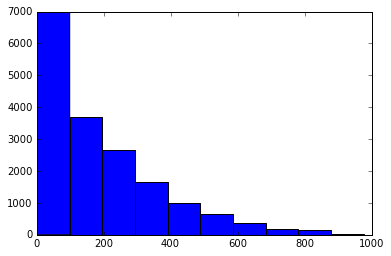

In [3]:
plt.hist(bike_rentals['cnt'])
plt.show()

#### Let's take a look at the correlations of all the columns in the dataset with the "cnt" column. 

In [4]:
np.abs(bike_rentals.corr()['cnt']).sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

# 2. Calculating Features

#### In order to make a better ML model, we would want to catergorize the "hr" column, so that our model can have a better data reach to study the patterns. 

#### Let's create a function to divide the 24hrs in to four parts of the day, and create a new column to the dataset with the new catergorized data.

In [5]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    elif hour >= 0 and hour < 6:
        return 4

In [6]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

# 3. Splitting the Data Into Train and Test Sets

For the training set, we will take 80% of the original dataset. To make a better training set, let's randomize the rows while picking the 80%. 

The test set will be the rest of the rows that are not in the training set.

In [7]:
train = bike_rentals.sample(frac=0.8, random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

# 4. Applying Linear Regression

Given that most of the columns are highly correlated with the "cnt" column, let's try applying Linear Regression first. It might give fair results, but not the most accurate. Let's take the result of Linear Regression as a starting point, so we can compare with the more advanced models we build.

First, however, we need to remove a few columns in order to train our model.

In [8]:
predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

In [9]:
predictors

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

#### Importing the LinearRegression class from Scikit Learn

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [11]:
regressor.fit(train[predictors],train['cnt'])
predictions = regressor.predict(test[predictors])

In [12]:
mse = np.mean((predictions - test['cnt'])**2)
rmse = np.sqrt(mse)

print('Mean Squared Error =', mse)
print('Root Mean Squared Error =', rmse)

Mean Squared Error = 17052.124871247568
Root Mean Squared Error = 130.5837848710458


#### The above result will now be taken as a starting point. Let's try to use Decision Tree Regression to see if we can make a better model.

# 4. Applying Decision Tree Regression

#### Let's take min_samples_leaf as 5 for now, and see the results first. Then, we can tune our Decision Tree model accordingly

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(min_samples_leaf = 5)

In [14]:
dt_regressor.fit(train[predictors], train['cnt'])
dt_predictions = dt_regressor.predict(test[predictors])

In [15]:
mse = np.mean((dt_predictions - test['cnt'])**2)
rmse = np.sqrt(mse)

print('Mean Squared Error =', mse)
print('Root Mean Squared Error =', rmse)

Mean Squared Error = 2743.654618013062
Root Mean Squared Error = 52.37990662470736


#### Now let's see how our model behaves when we vary "min_samples_leaf" between 1 and 9.

In [16]:
mse_list = []
rmse_list = []
for i in range(1,10):
    dt_regressor = DecisionTreeRegressor(min_samples_leaf = i)
    
    dt_regressor.fit(train[predictors], train['cnt'])
    dt_predictions = dt_regressor.predict(test[predictors])
    
    mse = np.mean((dt_predictions - test['cnt'])**2)
    rmse = np.sqrt(mse)
    
    mse_list.append(mse)
    rmse_list.append(rmse)

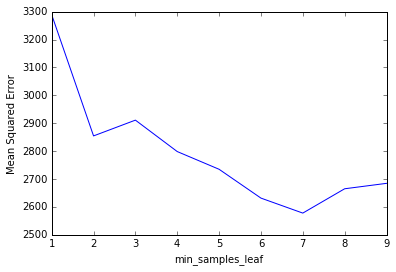

In [17]:
plt.plot(range(1,10),mse_list)
plt.xticks(range(1,10))
plt.xlabel("min_samples_leaf")
plt.ylabel("Mean Squared Error")
plt.show()

In [18]:
print('With min_samples_leaf set to 7, we get the lowest MSE and RMSE which are',
      mse_list[6], 'and',rmse_list[6])

With min_samples_leaf set to 7, we get the lowest MSE and RMSE which are 2578.1547991084585 and 50.775533469462026


#### This is a significant improvement. We lowered our MSE from 17000 to 2587 by using Decision Trees. Now let's see if we can improve our model more by using Random Forrest Regression.

# 6. Random Forrest Regression

For a start, lets use the same number of "min_samples_leaf" as the Decision Tree model we built.

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(min_samples_leaf=7)

In [20]:
rf_regressor.fit(train[predictors], train['cnt'])
rf_predictions = rf_regressor.predict(test[predictors])

In [21]:
mse = np.mean((rf_predictions - test['cnt'])**2)
rmse = np.sqrt(mse)

print('Mean Squared Error =', mse)
print('Root Mean Squared Error =', rmse)

Mean Squared Error = 2300.002673851222
Root Mean Squared Error = 47.95834310994513


In [22]:
mse_list = []
rmse_list = []
for i in range(1,10):
    rf_regressor = RandomForestRegressor(min_samples_leaf = i)
    
    rf_regressor.fit(train[predictors], train['cnt'])
    rf_predictions = rf_regressor.predict(test[predictors])
    
    mse = np.mean((rf_predictions - test['cnt'])**2)
    rmse = np.sqrt(mse)
    
    mse_list.append(mse)
    rmse_list.append(rmse)

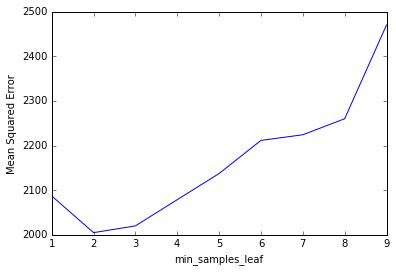

In [23]:
plt.plot(range(1,10),mse_list)
plt.xticks(range(1,10))
plt.xlabel("min_samples_leaf")
plt.ylabel("Mean Squared Error")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(min_samples_leaf=2)

In [25]:
rf_regressor.fit(train[predictors], train['cnt'])
rf_predictions = rf_regressor.predict(test[predictors])

In [26]:
mse = np.mean((rf_predictions - test['cnt'])**2)
rmse = np.sqrt(mse)

print('Mean Squared Error =', mse)
print('Root Mean Squared Error =', rmse)

Mean Squared Error = 2026.5564142126668
Root Mean Squared Error = 45.017290169585586


Great! Using Random Forest Regression, we were able to mitigate overfitting and build a good model to predict our bike rentals! 